In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
path_feb=r"C:\Users\aditi\Music\Top3_twitters\highest_tweets_Feb_labeled_tweets.csv"
data_feb= pd.read_csv(path_feb)
path_mar=r"C:\Users\aditi\Music\Top3_twitters\highest_tweets_March_labeled_tweets.csv"
data_mar=pd.read_csv(path_mar)
data_feb.head(5)

,Tweet,Sentiment
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0


# **Preprocessing and Cleaning**


In [3]:
#positive tweets
data_feb[data_feb['Sentiment'] == 1].head(10)

,Tweet,Sentiment
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1
10,The Democrat Iowa caucus debacle is a perfect metaphor for Democrat policy proposals for America - they would be a total disaster.,1
14,"The warning signs are flashing red. Our fixed forward bases are increasingly vulnerable. In order to deny China its objectives in the first island chain, our naval services must adapt and integrat...",1
16,Joining @Morning_Joe on @MSNBC soon to discuss the upcoming vote on the Articles of Impeachment -- despite not hearing from relevant witnesses or getting access to key documents at the heart of th...,1
17,"What happened to all Americans standing proudly during the national anthem?\n\nThe President has one standard for himself.\n\nAnd another for everyone else.\n\nApparently for some, it doesn’t matt...",1
18,I am pleased to see the SECURE Act signed into law! This bipartisan legislation is an important step forward in helping Americans save for retirement. I am committed to ensuring a lifetime of hard...,1


In [4]:
#negative tweets
data_feb[data_feb['Sentiment'] == -1].head(10)

,Tweet,Sentiment
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1
12,The REAL failed #IowaCaucuses message: #Socialists seek to rule #America. Socialism is top down #dictatorial govt that fraudulently steals our #freedom and #liberty with false promises of “comfort...,-1
13,"During the President’s speech tonight, I’ll be thinking about Claire &amp; all of the other kids living with pre-existing conditions. President Trump needs to stop trying to tear away the protecti...",-1
24,Voting by smartphone is a bad idea and Iowa is proving that counting votes via app is just as unreliable.,-1
25,How is rigging an election maybe wrong like stealing a cookie out of a cookie jar? Come on. Tiptoeing around a truly corrupt act (bribery) followed by a coverup is contemptible. https://t.co/Z4pM...,-1
27,"The inconsistencies, incompetence, and lack of transparency by Democrats in Iowa are matched only by the three-year-long deranged and incoherent crusade to oust @realDonaldTrump from office.",-1
28,"The inconsistencies, incompetence, and lack of transparency by Democrats in #Iowa are matched only by the three-year-long deranged and incoherent crusade to oust @realDonaldTrump from office.",-1
37,House Democrats impeachment process is a sham. It’s about taking @POTUS out of office &amp; off the ballot so that the American people don’t get to decide who their president is. https://t.co/ILSB...,-1
39,"My staff will host a Mobile Office in Chappell today. Please stop by if you need help with FEMA, USDA, FSA, VA, Medicare, or other federal agencies or have thoughts to share. #NE03 https://t.co/dV...",-1


In [5]:
data_feb.shape

(2832, 2)

In [6]:
#neutral tweets
data_feb[data_feb['Sentiment'] == 0].head(10)

,Tweet,Sentiment
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0
11,MDOC official disputes account of attempted suicide by inmate https://t.co/mfF49K5ijB via @clarionledger,0
15,Joining @michaelpleahy on The Tennessee Star Report this morning. Looking forward to discussing what we expect to hear from @POTUS tonight in the #SOTU. Tune in now here: https://t.co/ElvTXuPArZ,0
19,"ICYMI: Friday, I had a chance to visit USP Hazelton &amp; meet with the wardens &amp; corrections officers. We talked about ongoing challenges that are facing the prison. https://t.co/r9yNHinpow",0
33,TUNE IN ?️: About to join @glennbeck to talk about #SOTU and the end of the Senate #ImpeachmentTrial.\n\nListen here --&gt; https://t.co/d1B51W3ot9,0
35,"February is African American History Month. As a nation, we commemorate the trailblazers who have helped shape and influence our history and culture. Our country grows stronger when we fully embra...",0
36,"From Dr. King to Dr. Maya Angelou, this #BlackHistoryMonth we celebrate all the countless African American leaders who have been – and continue to be – our guiding lights in the fight for justice ...",0
38,Look forward to welcoming President @RealDonaldTrump to the U.S. Capitol tonight. He will be delivering the annual State of the Union address. https://t.co/HgDaI9uUW4,0


In [7]:
#Sentiment distribution feb
data_feb["Sentiment"].value_counts()

 1    1719
 0     671
-1     442
Name: Sentiment, dtype: int64

In [8]:
#Sentiment distribution mar
data_mar["Sentiment"].value_counts()

 1    1299
 0     409
-1     352
Name: Sentiment, dtype: int64

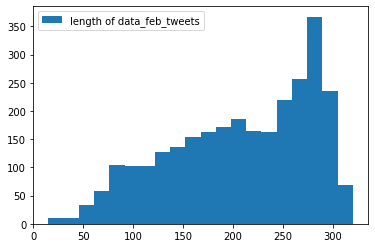

In [9]:
#Distribution of length of the tweets
length_data_feb = data_feb['Tweet'].str.len()

plt.hist(length_data_feb, bins=20, label="length of data_feb_tweets")

plt.legend()
plt.show()

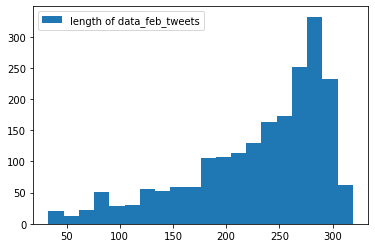

In [10]:
#Distribution of length of the tweets
length_data_feb = data_mar['Tweet'].str.len()

plt.hist(length_data_feb, bins=20, label="length of data_feb_tweets")

plt.legend()
plt.show()

# Data cleaning

In [11]:
#user-defined function to remove unwanted text patterns from the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

## 1. Remove Twitter handles (@user)

In [12]:
#Feb
data_feb['tidy_tweet'] = np.vectorize(remove_pattern)(data_feb['Tweet'], "@[\w]*") 
data_feb.head(10)

,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks"
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://..."
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,Which issue do you want to hear from on during tonight’s #SOTU?
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1,Up early to join ! Even ran into in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili..."
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT \n#sassywithmassie \n#S...
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with , , &amp; to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit ."


In [13]:
#March
data_mar['tidy_tweet'] = np.vectorize(remove_pattern)(data_mar['Tweet'], "@[\w]*") 
# data_mar.head(10)

## 2. Remove URLs

In [14]:
data_feb['tidy_tweet'] = data_feb['tidy_tweet'].str.replace('https?://[A-Za-z0-9./]+', "")
data_feb.head(10)

,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks"
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie"
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,Which issue do you want to hear from on during tonight’s #SOTU?
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1,Up early to join ! Even ran into in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial.
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili..."
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here:
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT \n#sassywithmassie \n#S...
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with , , &amp; to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit ."


In [15]:
data_mar['tidy_tweet'] = data_mar['tidy_tweet'].str.replace('https?://[A-Za-z0-9./]+', "")


## 3. Removing Punctuations, Numbers, and Special Characters

In [16]:
data_feb['tidy_tweet'] = data_feb['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data_feb.head(10)

,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count The Heart of the Heartland has saved America before Take a deep breath and count to precision ...
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,Record jobs lower taxes new trade deals and eliminating terrorists vs a party that can t count voters after months to prepare #NoThanks
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,In the wake of the Democrats #IowaCaucus dumpster fire can we once and for all recognize that HR the Democrats election reform bill needs to be killed with fire #sassywithmassie
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,Word is the DNC is presenting a participation award to each of the candidates #iowacaucus
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,Which issue do you want to hear from on during tonight s #SOTU
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1,Up early to join Even ran into in the green room Tune in at am AZ to get my take on this week s closing arguments in the impeachment trial
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1,Throughout her life Rosa Parks stood strong against the forces of injustice While we commemorate a great American hero we also reflect on our own fight against inequity May we all be as resili...
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1,cases of #coronavirus have been found in the U S so far The spread of the virus has led the government to declare a public health emergency More information on coronavirus here
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump Looking forward to a strong State of the Union tonight HT #sassywithmassie #SOTU
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0,WATCH This morning at am CT I ll be on #FoxAndFriends with amp to discuss tonight s #SOTU and tomorrow s historic vote in the #Senate to acquit


In [17]:
data_mar['tidy_tweet'] = data_mar['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

## 4. Remove short words

In [18]:
data_feb['tidy_tweet'] = data_feb['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data_feb.head(10)

,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,#IowaCaucuses remain first nation Democrats must give reliable definitive count Heart Heartland saved America before Take deep breath count precision matter long takes
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,Record jobs lower taxes trade deals eliminating terrorists party that count voters after months prepare #NoThanks
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,wake Democrats #IowaCaucus dumpster fire once recognize that Democrats election reform bill needs killed with fire #sassywithmassie
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,Word presenting participation award each candidates #iowacaucus
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,Which issue want hear from during tonight #SOTU
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1,early join Even into green room Tune take this week closing arguments impeachment trial
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1,Throughout life Rosa Parks stood strong against forces injustice While commemorate great American hero also reflect fight against inequity resilient fierce against Rosa #RosaParks
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1,cases #coronavirus have been found spread virus government declare public health emergency More information coronavirus here
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1,Maybe Democrats want nobody #Iowacaucus because they finally realized nobody beat Trump Looking forward strong State Union tonight #sassywithmassie #SOTU
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0,WATCH This morning #FoxAndFriends with discuss tonight #SOTU tomorrow historic vote #Senate acquit


In [19]:
data_mar['tidy_tweet'] = data_mar['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## 5. Tokenization

In [20]:
import re
# def clean_text(text):
#     tokens=re.split('\W+',text)
#     return tokens

# data_feb['tidy_tweet']=data_feb['tidy_tweet'].apply(lambda x: clean_text(x.lower()))
data_feb['tidy_tweet']=data_feb['tidy_tweet'].apply(lambda x: x.split())

data_feb.head(10)

,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,"[#IowaCaucuses, remain, first, nation, Democrats, must, give, reliable, definitive, count, Heart, Heartland, saved, America, before, Take, deep, breath, count, precision, matter, long, takes]"
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,"[Record, jobs, lower, taxes, trade, deals, eliminating, terrorists, party, that, count, voters, after, months, prepare, #NoThanks]"
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,"[wake, Democrats, #IowaCaucus, dumpster, fire, once, recognize, that, Democrats, election, reform, bill, needs, killed, with, fire, #sassywithmassie]"
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,"[Word, presenting, participation, award, each, candidates, #iowacaucus]"
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,"[Which, issue, want, hear, from, during, tonight, #SOTU]"
5,Up early to join @foxandfriends! Even ran into @DHS_Wolf in the green room. Tune in at 5:20am AZ to get my take on this week’s closing arguments in the impeachment trial. https://t.co/eQ5gDUJqnH,-1,"[early, join, Even, into, green, room, Tune, take, this, week, closing, arguments, impeachment, trial]"
6,"Throughout her life, Rosa Parks stood strong against the forces of injustice. While we commemorate a great American hero, we also reflect on our own fight against inequity. May we all be as resili...",1,"[Throughout, life, Rosa, Parks, stood, strong, against, forces, injustice, While, commemorate, great, American, hero, also, reflect, fight, against, inequity, resilient, fierce, against, Rosa, #Ro..."
7,11 cases of #coronavirus have been found in the U.S. so far. The spread of the virus has led the government to declare a public health emergency. More information on coronavirus here: https://t.co...,1,"[cases, #coronavirus, have, been, found, spread, virus, government, declare, public, health, emergency, More, information, coronavirus, here]"
8,Maybe the Democrats want nobody to win the #Iowacaucus because they finally realized nobody can beat Trump?\n\nLooking forward to a strong State of the Union tonight!\n\nHT @PJORourke\n#sassywithm...,1,"[Maybe, Democrats, want, nobody, #Iowacaucus, because, they, finally, realized, nobody, beat, Trump, Looking, forward, strong, State, Union, tonight, #sassywithmassie, #SOTU]"
9,"WATCH ?: This morning at 7:35am CT, I’ll be on #FoxAndFriends with @ainsleyearhardt, @SteveDoocy, &amp; @kilmeade to discuss tonight’s #SOTU and tomorrow’s historic vote in the #Senate to acquit @...",0,"[WATCH, This, morning, #FoxAndFriends, with, discuss, tonight, #SOTU, tomorrow, historic, vote, #Senate, acquit]"


In [21]:

data_mar['tidy_tweet']=data_mar['tidy_tweet'].apply(lambda x: x.split())

# data_feb.head(10)

### Normalize tweets

In [22]:
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

# data_feb['tidy_tweet'] = data_feb['tidy_tweet'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

# data_feb.head()

### Joining back the tokens

In [23]:
def join_text(text):
    text=" ".join([word for word in text])
    return text

data_feb["tidy_tweet"]=data_feb["tidy_tweet"].apply(lambda x: join_text(x))
data_mar["tidy_tweet"]=data_mar["tidy_tweet"].apply(lambda x: join_text(x))
data_feb.head()


,Tweet,Sentiment,tidy_tweet
0,#IowaCaucuses can remain first in the nation but Democrats must give us a reliable definitive count. The Heart of the Heartland has saved America before. Take a deep breath and count to precision-...,1,#IowaCaucuses remain first nation Democrats must give reliable definitive count Heart Heartland saved America before Take deep breath count precision matter long takes
1,"Record jobs, lower taxes, new trade deals, and eliminating terrorists vs. a party that can’t count voters after 8 months to prepare. #NoThanks",1,Record jobs lower taxes trade deals eliminating terrorists party that count voters after months prepare #NoThanks
2,"In the wake of the Democrats’ #IowaCaucus dumpster fire, can we once and for all recognize that HR 1, the Democrats’ election reform bill, needs to be killed with fire? ? #sassywithmassie https://...",-1,wake Democrats #IowaCaucus dumpster fire once recognize that Democrats election reform bill needs killed with fire #sassywithmassie
3,Word is the DNC is presenting a participation award to each of the candidates. #iowacaucus https://t.co/7K5x5eoJDR,0,Word presenting participation award each candidates #iowacaucus
4,Which issue do you want to hear from @realDonaldTrump on during tonight’s #SOTU?,0,Which issue want hear from during tonight #SOTU


## Visualization from tweets

## Understanding the common words: wordcloud

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### February

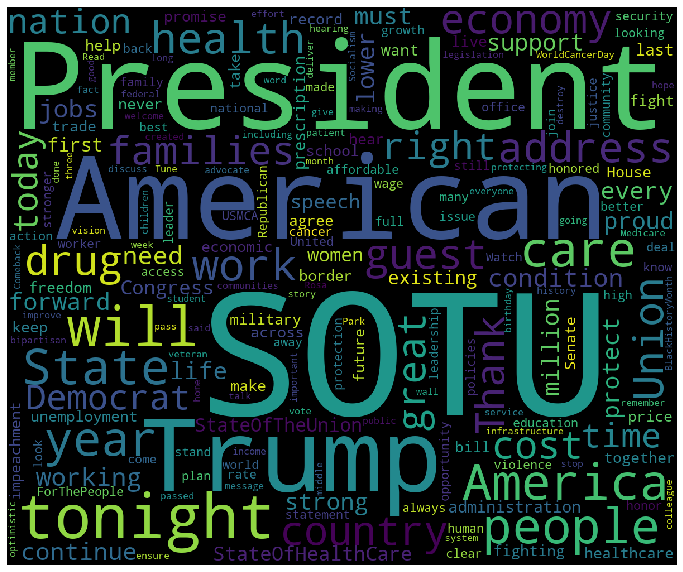

In [31]:

# all_words = ' '.join([text for text in data_feb['tidy_tweet']])
# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()


from wordcloud import WordCloud, STOPWORDS
bigstring = ' '.join([text for text in data_feb['tidy_tweet']])
# print(bigstring)
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

## 1. Words in positive tweets

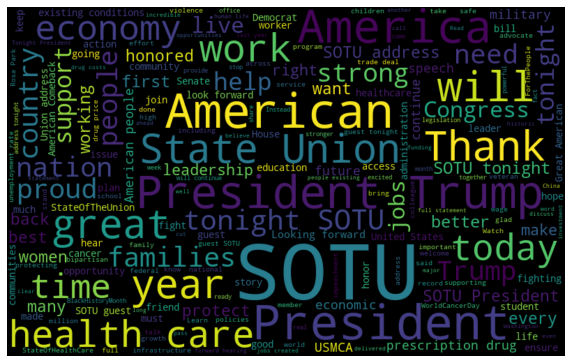

In [33]:
positive_words =' '.join([text for text in data_feb['tidy_tweet'][data_feb['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 2. Words in negative tweets

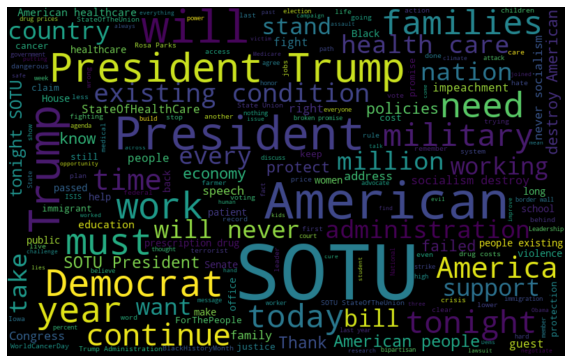

In [34]:
negative_words = ' '.join([text for text in data_feb['tidy_tweet'][data_feb['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 3. Impact of hashtags on tweets sentiments

In [36]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [37]:
# extracting hashtags from positive and negative tweets

HT_positive = hashtag_extract(data_feb['tidy_tweet'][data_feb['Sentiment'] == 1])
# print(HT_positive)
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data_feb['tidy_tweet'][data_feb['Sentiment'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


### Top 10 frequent hashtags in positive tweets

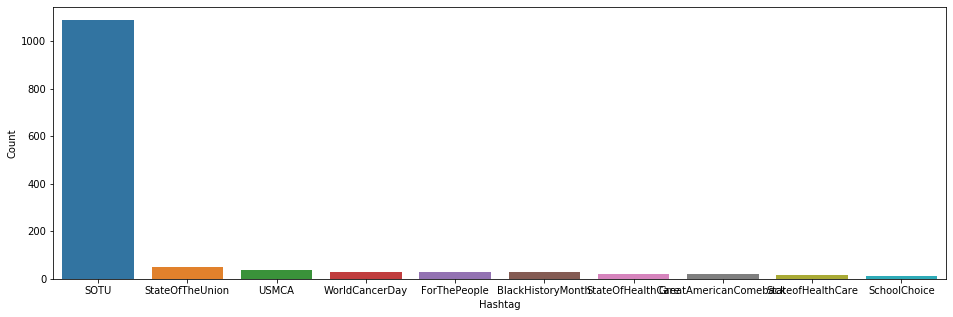

In [38]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
# print(d)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Top 10 frequent hashtags in negative tweets

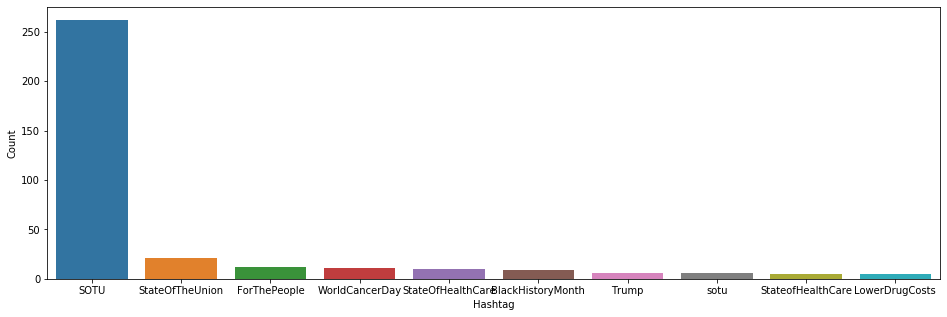

In [39]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## March

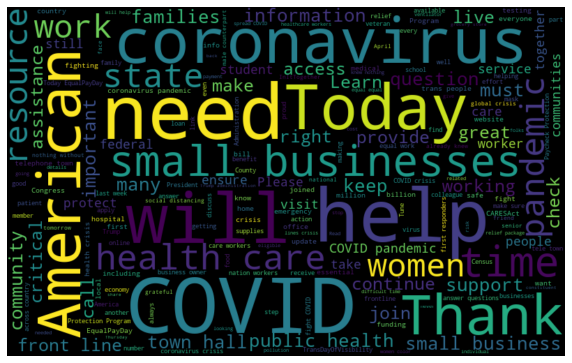

In [41]:
all_words = ' '.join([text for text in data_mar['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 1. Words in positive tweets

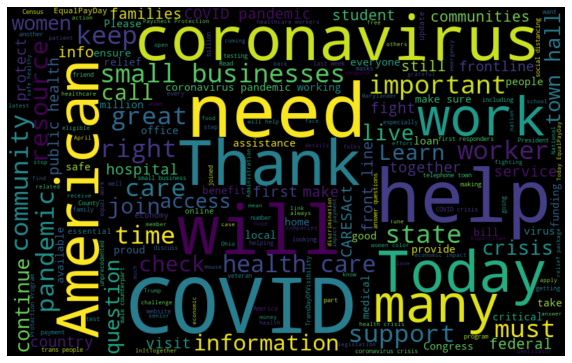

In [42]:
positive_words =' '.join([text for text in data_mar['tidy_tweet'][data_mar['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 2. Words in negative tweets

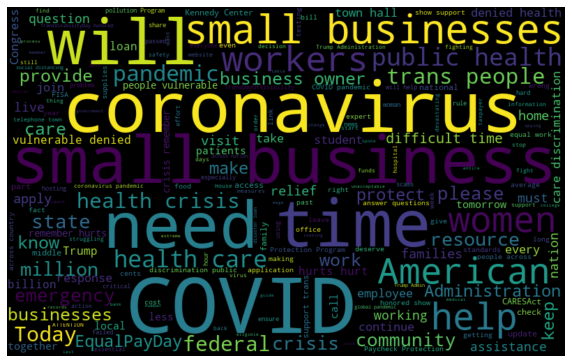

In [43]:
negative_words = ' '.join([text for text in data_mar['tidy_tweet'][data_mar['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 3. Impact of hashtags on tweets sentiments

In [44]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [45]:
# extracting hashtags from positive and negative tweets

HT_positive = hashtag_extract(data_mar['tidy_tweet'][data_mar['Sentiment'] == 1])
# print(HT_positive)
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data_mar['tidy_tweet'][data_mar['Sentiment'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

## Top 10 frequent hashtags in positive tweets

                 Hashtag  Count
2                  COVID    217
1            coronavirus    104
19           EqualPayDay     82
5               CARESAct     41
21  TransDayOfVisibility     31
46              EqualPay     25
4           InItTogether     24
15    TransVisibilityDay     21
11        CesarChavezDay     19
3            Coronavirus     12


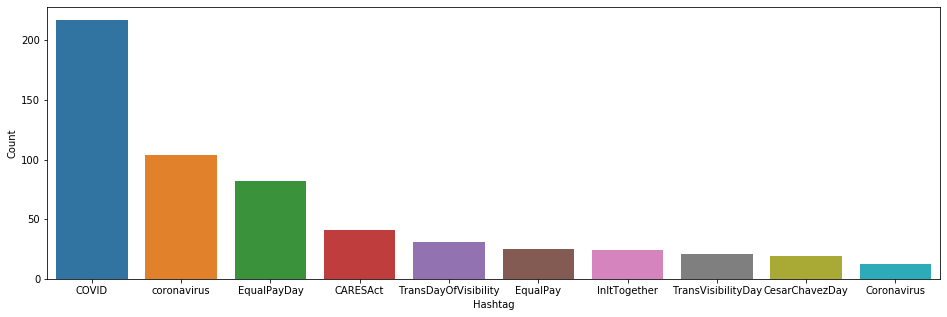

In [46]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
print(d)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Top 10 frequent hashtags in negative tweets

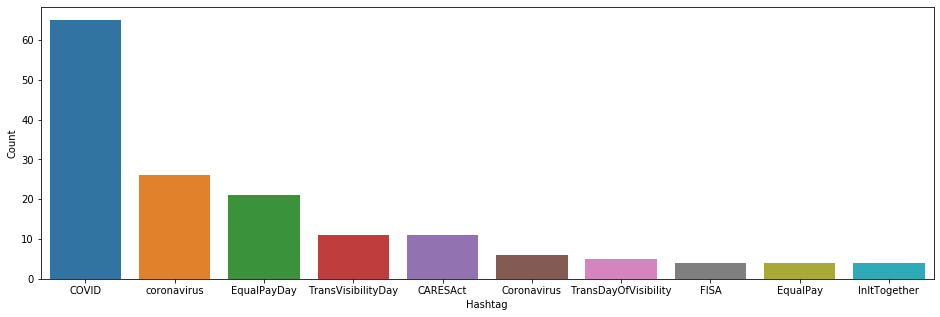

0                                                                                                                       friend makes excellent point regulatory relief save lives especially
1    unbelievable that country struggles combat #COVID pandemic there #coronavirus scams targeting seniors want know what doing make sure seniors protected from scams these difficult times
2                                          Thanks responding quickly approval more masks #Ohio team help many other issues important continue work with others respond #coronavirus pandemic
3                                                                     your family struggling food table #coronavirus visit They have hotline well information apply food assistance programs
4                                             order fight this pandemic must work together grateful this initiative important first step ensure child goes hungry during this difficult time
Name: tidy_tweet, dtype: object

In [50]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

data_mar['tidy_tweet'].head(5)

Bi-grams